In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Variables

In [2]:
T_e=1
T=100
sigma_Q=1
sigma_px=30
sigma_py=30

In [3]:
F=np.array([[1,T_e,0,0],[0,1,0,0],[0,0,1,T_e],[0,0,0,1]])
Q=sigma_Q*np.array([[T_e**3/3,T_e**2/2,0,0],[T_e**2/2,T_e,0,0],[0,0,T_e**3/3,T_e**2/2],[0,0,T_e**2,T_e]])
H=np.array([[1,0,0,0],[0,0,1,0]])
R=np.array([[sigma_px**2,0],[0,sigma_py**2]])

In [4]:
x_init=np.array([[3],[40],[-4],[20]])
x_kalm=x_init
P_kalm=np.identity(4)

# Fonctions

In [5]:
def creer_trajectoire(F=F,Q=Q,x_init=x_init,T=T):
    x=x_init
    vecteur_x=np.zeros((4,T))
    for n in range(T):
        U=np.random.multivariate_normal([0,0,0,0],Q).reshape((4,1))
        x=F@x+U
        vecteur_x[:,n]=x.reshape((4,))
    return vecteur_x
vecteur_x=creer_trajectoire()

/tmp/ipykernel_1158377/1059972482.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  U=np.random.multivariate_normal([0,0,0,0],Q).reshape((4,1))


In [6]:
def creer_observation(vecteur_x,H=H,R=R,T=T):
    vecteur_y=np.zeros((2,T))
    for n in range(T):
        x=vecteur_x[:,n]
        V=np.random.multivariate_normal([0,0],R).reshape((2,1))
        y=H@x+V.T
        vecteur_y[:,n]=y.reshape((2,))
    return vecteur_y

In [48]:
def filtre_de_kalman(y_k,x_kalm_prec,P_kalm_prec,F=F,Q=Q,H=H,R=R):
    y_k=y_k.reshape((2,1))
    x_kalm=F@x_kalm_prec
    print(x_kalm.shape)
    P_kalm=F@P_kalm_prec@F.T + Q
    print(P_kalm.shape)
    temp=H@P_kalm@H.T+R
    temp=np.linalg.inv(temp)
    K=P_kalm@H.T@temp
    print(K.shape)
    P_kalm_k=(np.identity(4) + K@H)@P_kalm
    print(P_kalm_k.shape)
    x_kalm_k=x_kalm+K@(y_k-H@x_kalm)
    print(x_kalm_k)
    return x_kalm_k,P_kalm_k

In [49]:
def kalman_recursif(vecteur_y,vecteur_y0,x_kalm=x_kalm,P_kalm=P_kalm,T=T):
    x_est=np.zeros((4,T))
    x_est[:,0]=x_kalm.reshape((4,))
    for n in range(1,T):
        x_kalm,P_kalm=filtre_de_kalman(vecteur_y[:,n],x_kalm,P_kalm)
        x_est[:,n]=x_kalm
    return x_est

# Main

In [50]:
vecteur_x=creer_trajectoire()
vecteur_y=creer_observation(vecteur_x)
x_est=kalman_recursif(vecteur_y,x_init)

(4, 1)
(4, 4)
(4, 2)
(4, 4)
[[43.13354526]
 [40.08585053]
 [16.0569543 ]
 [20.04881797]]


/tmp/ipykernel_1158377/1059972482.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  U=np.random.multivariate_normal([0,0,0,0],Q).reshape((4,1))


ValueError: could not broadcast input array from shape (4,1) into shape (4,)

In [11]:
dfx=pd.DataFrame(vecteur_x.T,columns=['px','px.','py','py.'])
dfy=pd.DataFrame(vecteur_y.T,columns=['Opx','Opy'])
df=pd.concat([dfx,dfy],axis=1)

In [12]:
df

,px,px.,py,py.,Opx,Opy
0,42.912057,39.886057,17.818172,21.049397,43.176429,12.923129
1,82.260531,38.304445,39.219065,20.243097,107.826676,46.514248
2,118.859672,36.157739,60.983573,21.671614,125.229680,88.242496
3,155.293812,37.068676,82.297509,21.320402,128.050354,113.873403
4,192.477406,38.183539,103.645066,21.953149,180.416350,44.850775
...,...,...,...,...,...,...
95,3551.515086,40.161296,1979.677762,21.416453,3558.686293,1943.113836
96,3592.135833,41.449023,2000.591585,20.310430,3651.413275,1964.318876
97,3633.171219,41.163818,2021.633440,21.222905,3655.687814,1963.892150
98,3674.236750,41.285023,2043.249369,21.263345,3675.715319,2055.368939


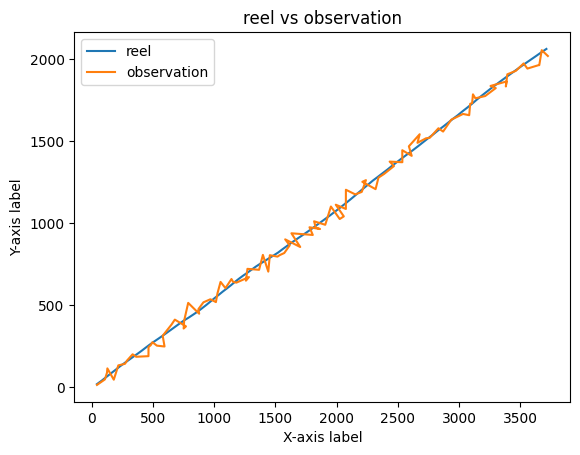

In [13]:
# Assuming df is your DataFrame
plt.plot(df['px'], df['py'], label='reel')
plt.plot(df['Opx'], df['Opy'], label='observation')

# Set labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('reel vs observation')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
df